In [1]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)
import contextily as cx
import pandas as pd

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

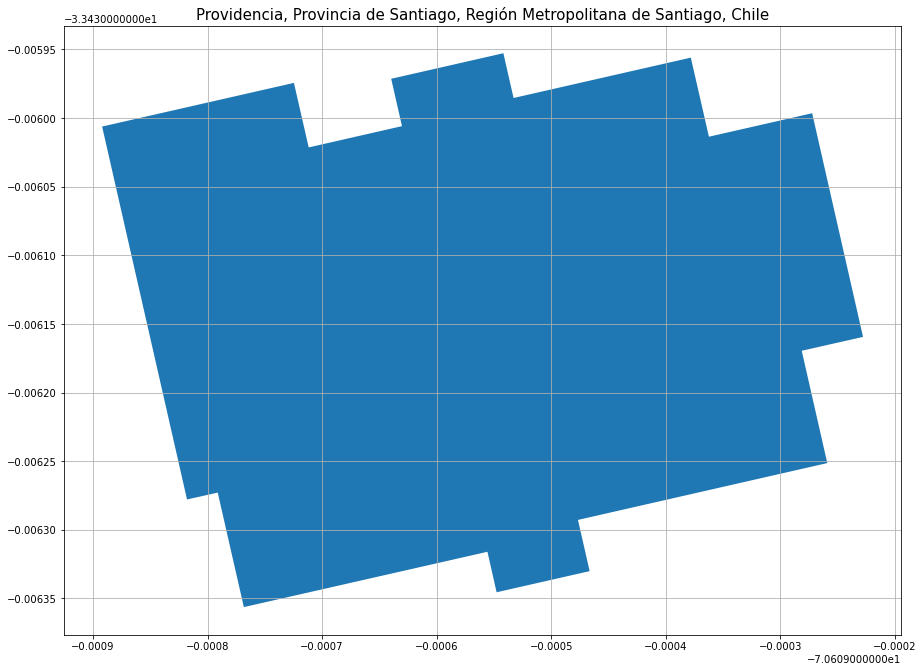

In [3]:
region_name = 'Providencia, Provincia de Santiago, Región Metropolitana de Santiago, Chile' 

region = ox.geocode_to_gdf(region_name, which_result=2)

region.plot(figsize=(15,15))
plt.title(region_name, fontdict={'fontsize':15})
plt.grid()

In [4]:
buildings = ox.geometries_from_place(region_name, tags = {'building': True})

In [5]:
forest = ox.geometries.geometries_from_place(region_name, tags = {'landuse': 'forest'})
rivers = ox.geometries.geometries_from_place(region_name, tags = {'waterway': 'river'})

C:\Users\Pablo\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
roads = ox.graph_from_place(region_name)

C:\Users\Pablo\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Pablo\miniconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


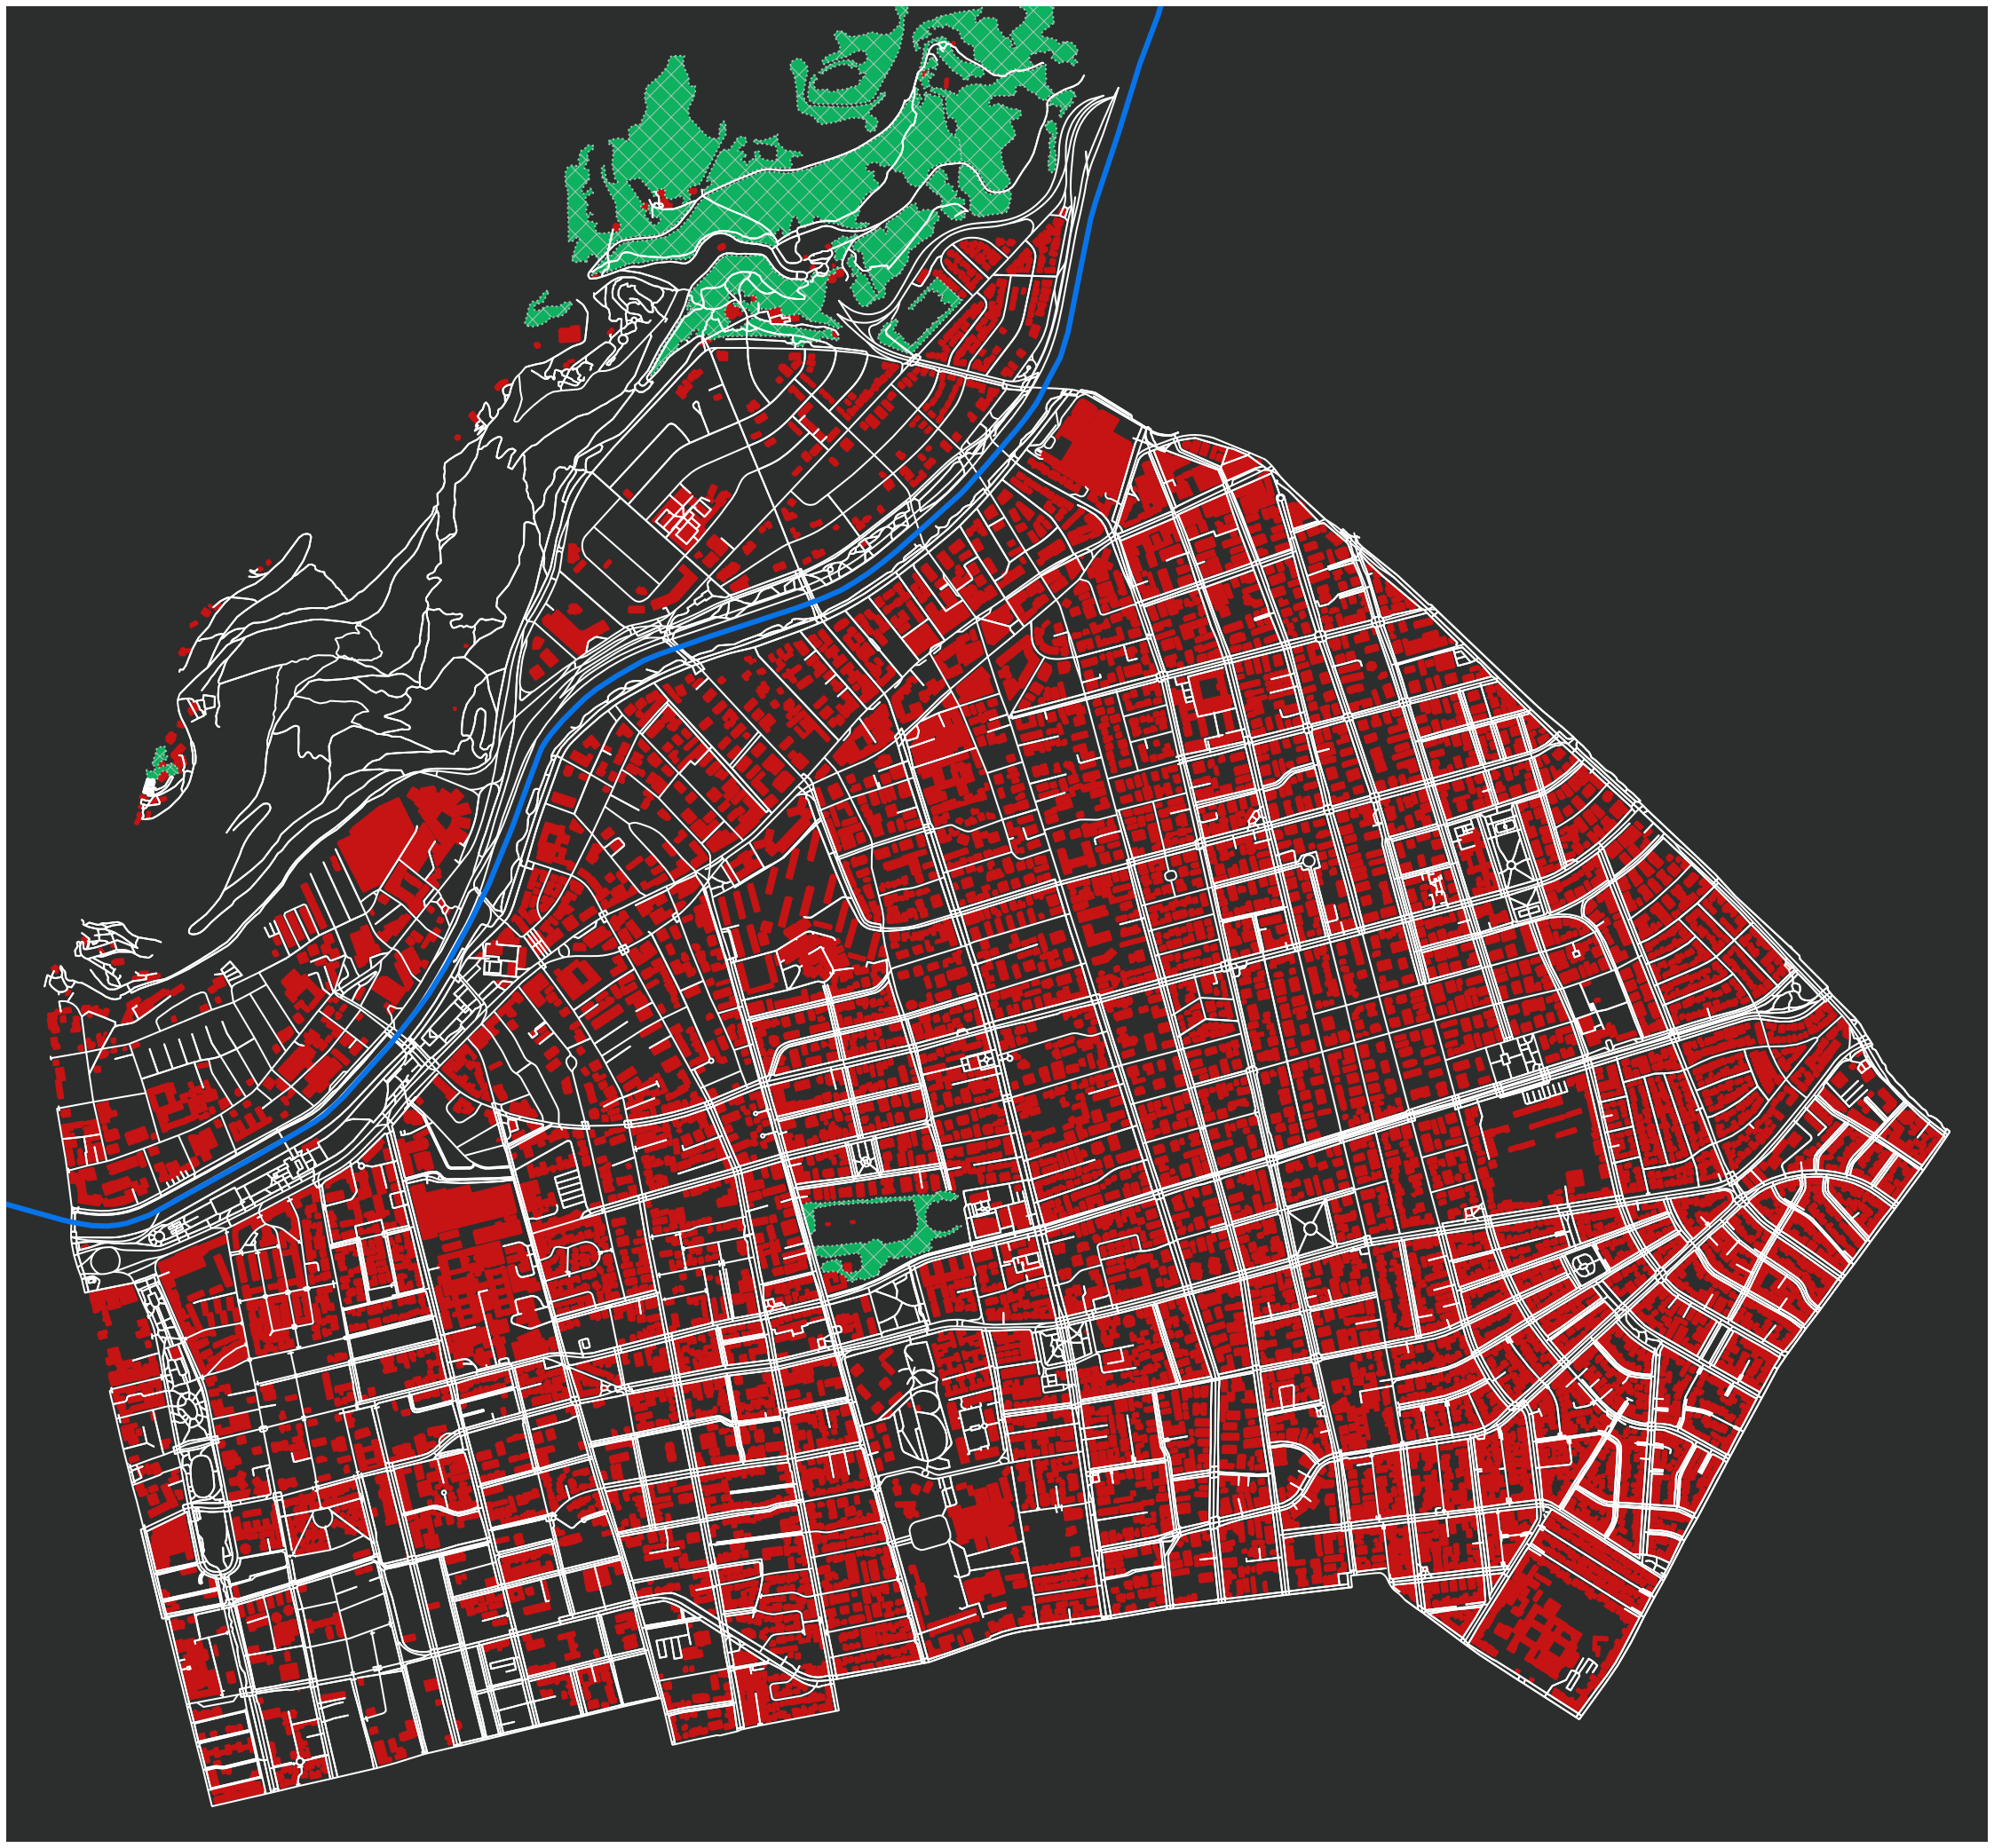

<Figure size 432x288 with 0 Axes>

In [12]:
ax = region.plot(facecolor = '#494D4D', figsize=(40,40))
ax.set_facecolor('#2C2E2E')
buildings.plot(facecolor = '#C61313',
                           edgecolor = '#C61313',
                           linewidth = 3,
                           markersize = 1,
                           ax = ax)
forest.plot(facecolor = '#0db15f',
            edgecolor = '#ADC3B8',
            linewidth = 2,
            linestyle = ':',
            hatch = 'x',
            ax = ax)

rivers.plot(edgecolor = '#0774ea',
            linewidth = 6,
            linestyle = '-',
            ax = ax)

ox.plot_graph(roads,
              edge_color = 'white',
              node_color = 'white',
              edge_linewidth=2,
              node_size = 2,
              ax=ax)

ax.grid('on', which='major', axis='x', color = '#99A2A2')
ax.grid('on', which='major', axis='y', color = '#99A2A2')
plt.tight_layout()
plt.savefig('../Chile/Providencia_grafo/providencia.png', dpi=400)
plt.show()